In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()

In [3]:
dataset = pd.read_csv("playstore.csv")

In [4]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [9]:
dataset.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [ ]:
#Data cleaning - missing value treatment 

In [11]:
print(f"missing values :\n{dataset.isnull().sum()}")

missing values :
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [ ]:
dataset=dataset.dropna(subset=['rating'])

In [14]:
print(f"Missing values :\n{dataset.isnull().sum()}")

Missing values :
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [15]:
#b check the null values for the android ver column.

print(f"Missing Values :\n{dataset['Android Ver'].isnull().sum()}")

Missing Values :
3


In [16]:
print (dataset[dataset.isna().any(axis=1)])

                                   App             Category  Rating Reviews  \
15     Learn To Draw Kawaii Characters       ART_AND_DESIGN     3.2      55   
23              Mcqueen Coloring pages       ART_AND_DESIGN     NaN      61   
113          Wrinkles and rejuvenation               BEAUTY     NaN     182   
123             Manicure - nail design               BEAUTY     NaN     119   
126       Skin Care and Natural Beauty               BEAUTY     NaN     654   
...                                ...                  ...     ...     ...   
10824                        Cardio-FR              MEDICAL     NaN      67   
10825               Naruto & Boruto FR               SOCIAL     NaN       7   
10831         payermonstationnement.fr  MAPS_AND_NAVIGATION     NaN      38   
10835                         FR Forms             BUSINESS     NaN       0   
10838           Parkinson Exercices FR              MEDICAL     NaN       3   

          Size  Installs  Type Price Content Rating

In [17]:
data2 = dataset.drop(10472)
# Verification
verify = data2[data2["App"]=='Life Made WI-Fi Touchscreen Photo Frame']
print (verify)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [18]:
import statistics
Android_list = data2['Android Ver'].to_list()
# print(Android_list)
# O/P ['4.2 and up', '1.5 and up', nan, nan, '4.0 and up', '4.0 and up']

# Did Manual work(illegal)
Al=[4.2,1.5,4.0,4.0]
# print(Al)
# print(statistics.mode(Al))
data2_new = data2.fillna(statistics.mode(Al))

print(data2_new.loc[[4453]])
print('--------------------------------------------------------------------')
print(data2_new.loc[[4490]])

                         App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   

     Installs  Type  Price Content Rating           Genres   Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization  July 20, 2018   

     Current Ver Android Ver  
4453         4.4         4.0  
--------------------------------------------------------------------
                       App         Category  Rating Reviews    Size Installs  \
4490  Pi Dark [substratum]  PERSONALIZATION     4.5     189  2100.0  10,000+   

      Type Price Content Rating           Genres    Last Updated Current Ver  \
4490  Free     0       Everyone  Personalization  March 27, 2018         1.1   

     Android Ver  
4490         4.0  


In [19]:
#c current ver replace with most common value 
print(f"Missing Values :{data2_new['Current Ver'].isnull().sum()}")

Missing Values :0


In [20]:
#2 DATACLEANUP - CORRECTING THE DATA TYPES 
#a which all variables need to be brought to numeric types ?
data2_new['Reviews'] = data2_new['Reviews'].astype(int)
data2_new['Size'] = data2_new['Size'].astype(int)
# Additional conversion
data2_new['Last Updated'] = data2_new['Last Updated'].astype('datetime64[ns]')


In [22]:
#b price variable- remove $ sign and convert to float 
data2_new['Price'] = data2_new['Price'].str.replace('$', '')

In [23]:
data2_new.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [25]:
data2_new['Price'] = data2_new['Price'].astype(float)

In [24]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10840 non-null  float64       
 3   Reviews         10840 non-null  int32         
 4   Size            10840 non-null  int32         
 5   Installs        10840 non-null  object        
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  object        
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10840 non-null  object        
 12  Android Ver     10840 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(9)
memory usage: 1.3+ MB


In [ ]:
#c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [28]:
data2_new['Installs'] = data2_new['Installs'].str.replace('+','')

C:\Users\GKUSHI~1\AppData\Local\Temp/ipykernel_2004/3270058225.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data2_new['Installs'] = data2_new['Installs'].str.replace('+','')


In [29]:
data2_new['Installs'] = data2_new['Installs'].str.replace(',', '')

In [30]:
data2_new['Installs'] = data2_new['Installs'].astype(int)

In [27]:
data2_new.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [31]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10840 non-null  float64       
 3   Reviews         10840 non-null  int32         
 4   Size            10840 non-null  int32         
 5   Installs        10840 non-null  int32         
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10840 non-null  object        
 12  Android Ver     10840 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(3), object(7)
memory usage: 1.3+ MB


In [ ]:
#3. Sanity checks – check for the following and handle accordingly

In [ ]:
#a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

In [32]:
pd.unique(data2_new[['Rating']].values.ravel())
#.ravel()-->return 1D array with all the input-array elements

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [ ]:
#b. Reviews should not be more than installs as only those who installed can review the app

In [33]:
df = pd.DataFrame()
df = data2_new[data2_new.Reviews <= data2_new.Installs]
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [34]:
df.shape

(10829, 13)

In [ ]:
#4. Identify and handle outliers –

In [ ]:
#a Price column

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\G KUSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


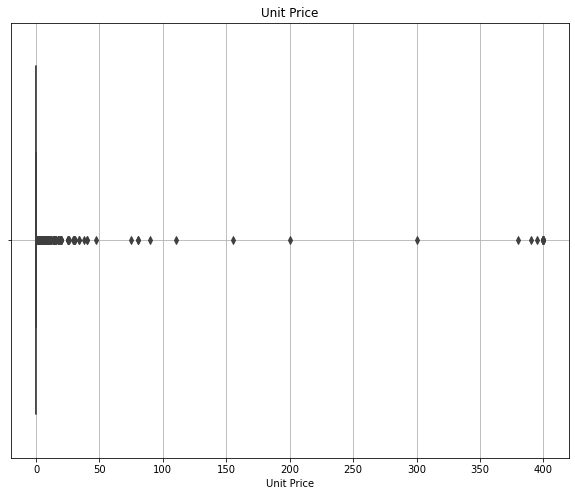

In [47]:
plt.subplots(figsize=(10,8))
sns.boxplot(df.Price)
plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='-')
plt.show()

In [50]:
rslt_df = data2_new[data2_new['Price'] == 200]
print(rslt_df)
# old dataset analysis (before data cleanning)
# rslt_df = dataset[dataset['Price'] == '$200.00']
# print(rslt_df)


               App Category  Rating  Reviews  Size  Installs  Type  Price  \
9719  EP Cook Book  MEDICAL     4.0        0  3200         0  Paid  200.0   

     Content Rating   Genres Last Updated Current Ver Android Ver  
9719       Everyone  Medical   2015-07-26         1.0  3.0 and up  


C:\Users\G KUSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


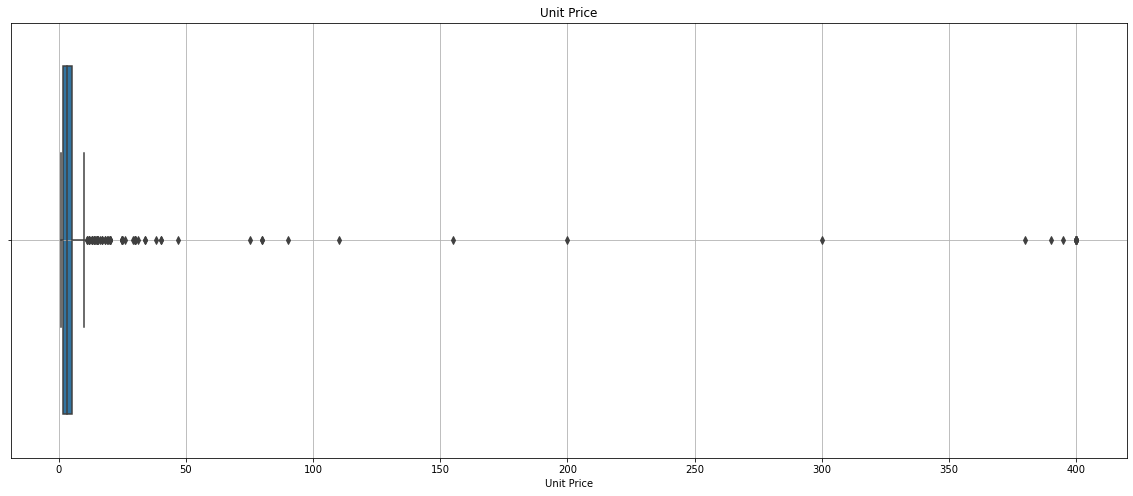

In [51]:
usful_df = df[df['Price'] != 0]
# usful_df
plt.subplots(figsize=(20,8))
sns.boxplot(usful_df.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

In [52]:
limit_data = df[df['Price'] < 30]
limit_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [53]:
limit_data.shape

(10798, 13)

In [ ]:
#b. Reviews column

Category
GAME                   1585422327
COMMUNICATION           815462260
SOCIAL                  621241402
FAMILY                  410226312
TOOLS                   273185033
PHOTOGRAPHY             213516650
SHOPPING                115041222
PRODUCTIVITY            114116975
VIDEO_PLAYERS           110380188
PERSONALIZATION          89346138
SPORTS                   70830169
TRAVEL_AND_LOCAL         62617919
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54400863
EDUCATION                39595786
HEALTH_AND_FITNESS       37893743
MAPS_AND_NAVIGATION      30659254
BOOKS_AND_REFERENCE      21959069
FINANCE                  17550728
WEATHER                  14604735
BUSINESS                 13954552
LIFESTYLE                12872535
FOOD_AND_DRINK            8883330
DATING                    7291278
HOUSE_AND_HOME            3976385
COMICS                    3383276
ART_AND_DESIGN            1714440
MEDICAL                   1585971
AUTO_AND_VEHICLES         1163666
LIBRA

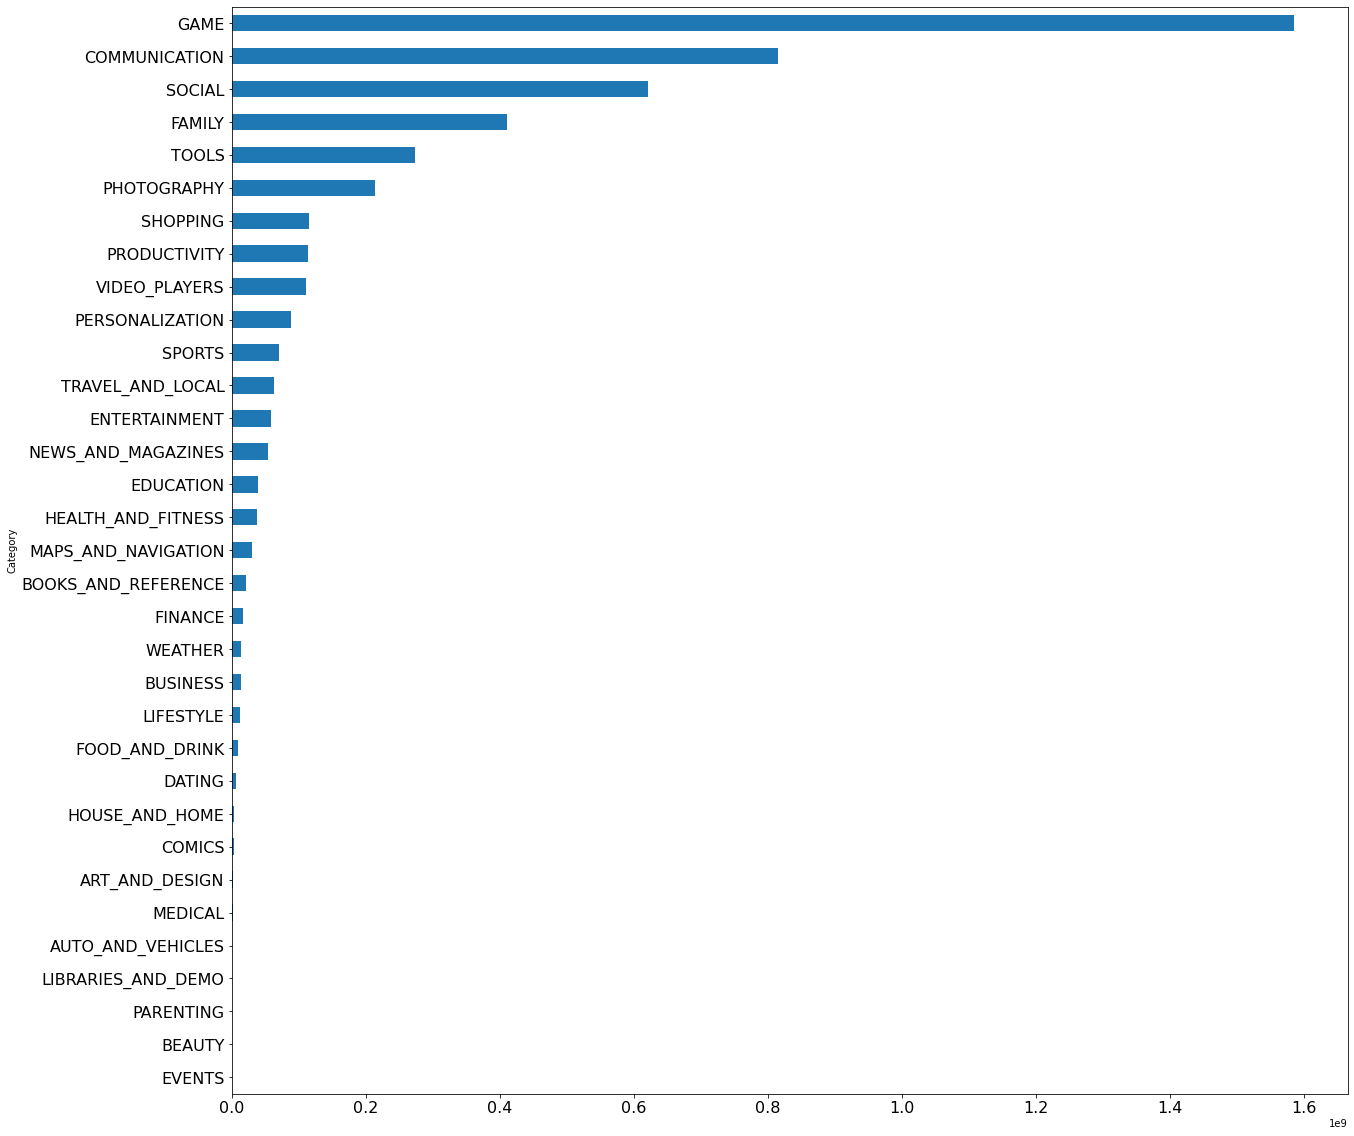

In [58]:
total=df.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(20,20))
total.plot(kind='barh', fontsize=16)
print(total.sort_values(ascending=False))
plt.show()

In [59]:
limit_data_by_review = df[df['Reviews'] < 1000000]
limit_data_by_review.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [60]:
limit_data_by_review.shape


(10125, 13)

In [ ]:
#c. Installs

In [61]:
val = df.Installs.quantile(0.95) #95th percentile
print(val)

50000000.0


In [62]:
# Verification
x = df.Installs.quantile() > val
print (x)

False


In [64]:
#Data analysis to answer business questions

In [ ]:
#What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

C:\Users\G KUSHI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


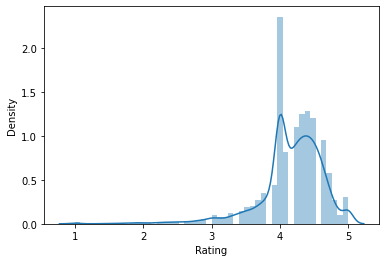

In [65]:
sns.distplot(df['Rating'])
plt.show()

In [ ]:
#b. What is the implication of this on your analysis?

#What are the top Content Rating values?

In [66]:
df['Content Rating'].value_counts()

Everyone           8704
Teen               1207
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [67]:
Adult_rating = df[df['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =df[df['Content Rating'] == 'Unrated'].index.to_list()
df.drop(Adult_rating, inplace = True)
df.drop(unrated, inplace = True)
df['Content Rating'].value_counts()

C:\Users\G KUSHI\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Everyone        8704
Teen            1207
Mature 17+       499
Everyone 10+     414
Name: Content Rating, dtype: int64

In [70]:
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'

In [71]:
# Pie Diagram


fig = go.Figure(go.Pie(name = "",
    values = [7414,1083,461,397],
    labels = ['Everyone','Teen','Mature 17+','Everyone 10+'],))
fig.show()

NameError: name 'go' is not defined

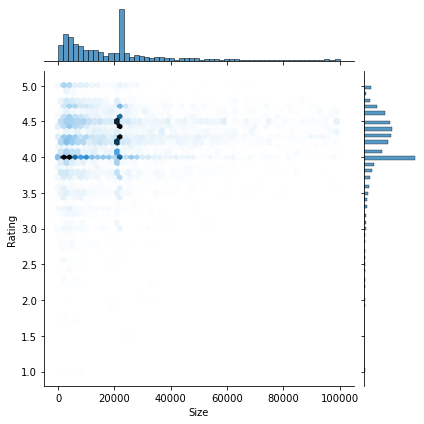

In [74]:
sns.jointplot(x=df['Size'],y=df['Rating'],data=df,kind='hex')
plt.show()

In [ ]:
#do you see any patterns? c. How do you explain the pattern?

In [ ]:
#Effect of price on rating
#a. Make a jointplot (with regression line)

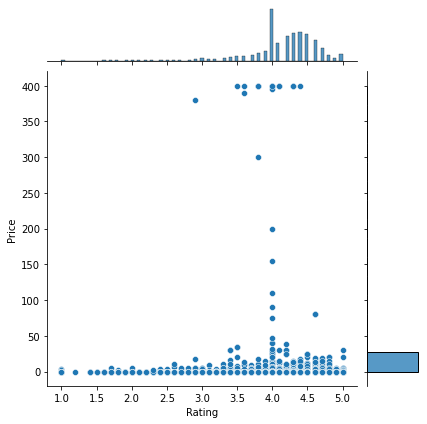

In [75]:
sns.jointplot(x ="Rating" , y = "Price" ,data = df)
plt.show()

In [ ]:
#b.What pattern do you see?

In [ ]:
#c. How do you explain the pattern?

In [ ]:
#d. Replot the data, this time with only records with price > 0

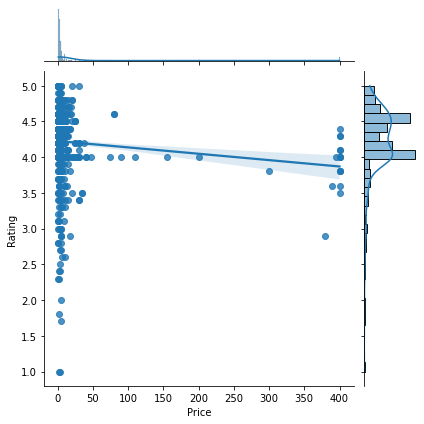

In [76]:
Price_greaterthan_zero = df[df['Price'] > 0]
sns.jointplot(x ="Price" , y = "Rating" ,data = Price_greaterthan_zero, kind = "reg" )
plt.show()

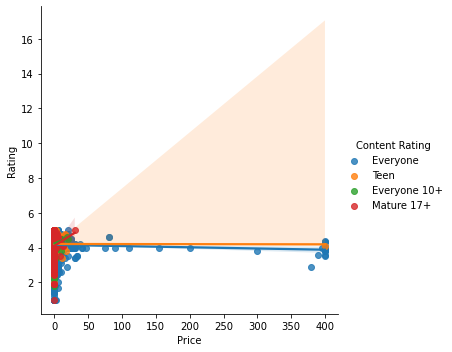

In [77]:
sns.lmplot(x='Price', y='Rating', hue ='Content Rating', data=df)
plt.show()

In [81]:
#Look at all the numeric interactions together – a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

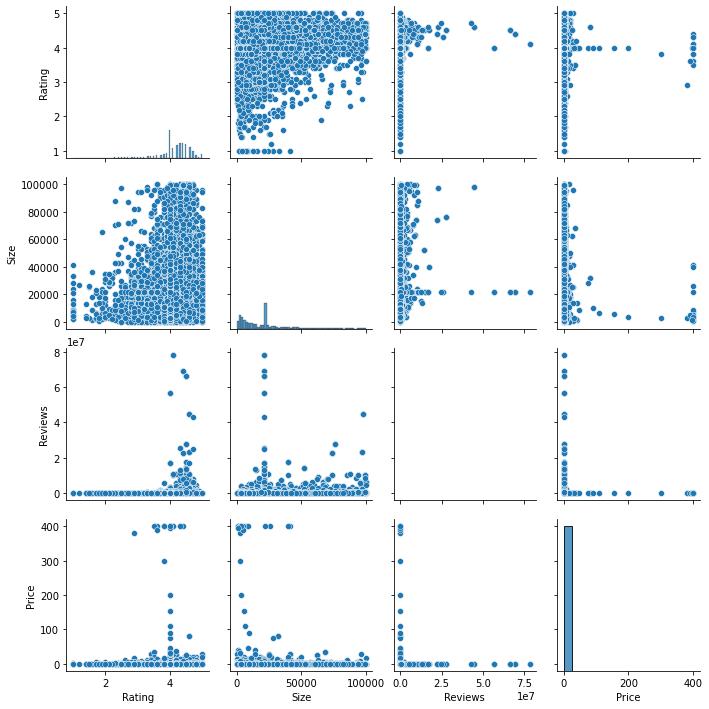

In [82]:
sns.pairplot(df,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

In [ ]:
#Rating vs. content rating
#a.Make a bar plot displaying the rating for each content rating

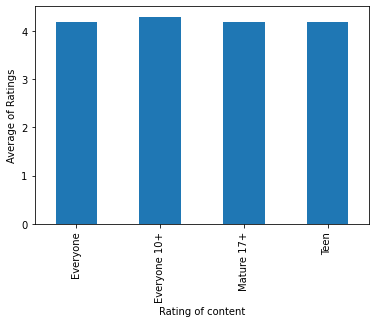

In [83]:
a = df['Rating'].groupby(df['Content Rating']).median().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

In [ ]:
# Which metric would you use? Mean? Median? Some other quantile?

#c. Choose the right metric and plot

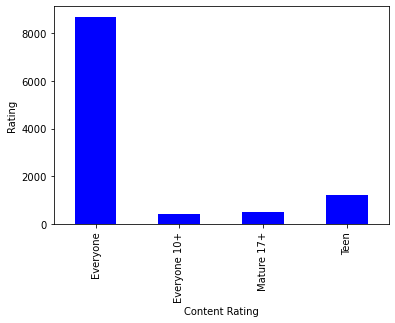

In [84]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="b")
plt.ylabel('Rating')
plt.show()

In [ ]:
#Content rating vs. size vs. rating – 3 variables at a time
#a. Create 5 buckets (20% records in each) based on Size

C:\Users\G KUSHI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


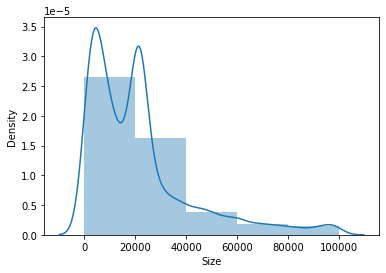

In [85]:
#Checking skewness
sns.distplot(df["Size"], bins=5)
plt.show()

In [87]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
df['Size_Buckets'] = pd.cut(df['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating')

C:\Users\GKUSHI~1\AppData\Local\Temp/ipykernel_2004/2697395882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size_Buckets'] = pd.cut(df['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])


Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.091984,4.178947,3.963830,4.167939
LOW,4.131406,4.161111,4.113393,4.163441
MED,4.217836,4.252344,4.087647,4.186165
HIGH,4.146095,4.203030,4.168333,4.199180
VERY HIGH,4.193144,4.286061,4.190000,4.277247


In [88]:
df.Size.quantile([0.2, 0.4,0.6,0.8])

0.2     4600.0
0.4    12000.0
0.6    21516.0
0.8    31000.0
Name: Size, dtype: float64

In [89]:
df.Rating.quantile([0.2, 0.4,0.6,0.8])

0.2    4.0
0.4    4.1
0.6    4.3
0.8    4.5
Name: Rating, dtype: float64

In [ ]:
#c. Make a heatmap of this

#i. Annotated

#ii. Greens color map

In [91]:
import numpy as np

In [92]:
Size_Buckets =pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.9,3.86,3.42,4.0
LOW,4.0,4.00,3.70,4.0
MED,4.0,4.10,3.90,4.0
HIGH,4.0,4.00,3.90,4.0
VERY HIGH,4.0,4.08,4.00,4.0


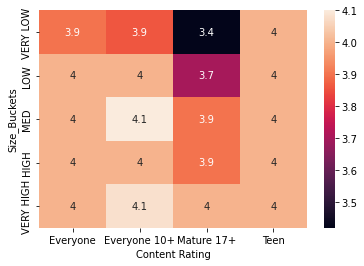

In [93]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

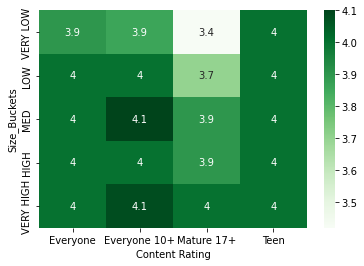

In [94]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()